# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

# importing data

In [2]:
data=pd.read_csv('churn_prediction.csv')

In [3]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [4]:
# getting shape of the data frame i.e no. of rows and column
data.shape

(28382, 21)

# checking null values

In [5]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64

In [6]:
data.dropna(inplace=True,axis=0,subset=['gender','dependents','occupation','city'])

In [7]:
data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
last_transaction                  0
dtype: int64

In [8]:
data.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,24832.000000,24832.000000,24832.000000,24832.000000,24832.000000,24832.000000,24832.000000,2.483200e+04,2.483200e+04,2.483200e+04,2.483200e+04,2.483200e+04,2.483200e+04,2.483200e+04,2.483200e+04,2.483200e+04,2.483200e+04,24832.000000
mean,15120.719555,2090.259907,47.818903,0.352368,798.836783,2.215689,864.746013,7.005608e+03,7.102969e+03,7.068944e+03,6.641527e+03,3.504050e+03,3.360356e+03,3.661734e+03,3.343667e+03,7.040927e+03,7.075169e+03,0.181943
std,8736.591147,273.916048,16.864493,1.007858,430.826252,0.663905,890.994940,2.130752e+04,2.200392e+04,2.047696e+04,1.866737e+04,8.166208e+04,3.069930e+04,5.401130e+04,2.376745e+04,2.073199e+04,2.194976e+04,0.385805
min,1.000000,73.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-5.503960e+03,-3.145380e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7525.500000,1957.000000,36.000000,0.000000,409.000000,2.000000,159.000000,1.799033e+03,1.916702e+03,2.193320e+03,1.847767e+03,3.300000e-01,3.300000e-01,4.300000e-01,4.300000e-01,2.018133e+03,2.083472e+03,0.000000
50%,15117.500000,2153.000000,46.000000,0.000000,837.000000,2.000000,531.000000,3.294560e+03,3.387745e+03,3.539225e+03,3.371800e+03,6.300000e-01,6.600000e-01,1.290450e+02,1.430700e+02,3.451155e+03,3.459390e+03,0.000000
75%,22680.250000,2292.000000,60.000000,0.000000,1096.000000,3.000000,1364.000000,6.629138e+03,6.655170e+03,6.662980e+03,6.517560e+03,7.149600e+02,8.146525e+02,1.428592e+03,1.428630e+03,6.664008e+03,6.648450e+03,0.000000
max,30301.000000,2476.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,1.398486e+06,1.398486e+06,1.398486e+06,1.389627e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,1.398486e+06,1.398486e+06,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24832 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     24832 non-null  int64  
 1   vintage                         24832 non-null  int64  
 2   age                             24832 non-null  int64  
 3   gender                          24832 non-null  object 
 4   dependents                      24832 non-null  float64
 5   occupation                      24832 non-null  object 
 6   city                            24832 non-null  float64
 7   customer_nw_category            24832 non-null  int64  
 8   branch_code                     24832 non-null  int64  
 9   current_balance                 24832 non-null  float64
 10  previous_month_end_balance      24832 non-null  float64
 11  average_monthly_balance_prevQ   24832 non-null  float64
 12  average_monthly_balance_prevQ2  

In [10]:
data.drop(inplace=True,columns=['customer_id','branch_code'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24832 entries, 0 to 28381
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   vintage                         24832 non-null  int64  
 1   age                             24832 non-null  int64  
 2   gender                          24832 non-null  object 
 3   dependents                      24832 non-null  float64
 4   occupation                      24832 non-null  object 
 5   city                            24832 non-null  float64
 6   customer_nw_category            24832 non-null  int64  
 7   current_balance                 24832 non-null  float64
 8   previous_month_end_balance      24832 non-null  float64
 9   average_monthly_balance_prevQ   24832 non-null  float64
 10  average_monthly_balance_prevQ2  24832 non-null  float64
 11  current_month_credit            24832 non-null  float64
 12  previous_month_credit           

# Encoding categorical data

In [12]:
data=pd.get_dummies(data,columns=['gender','occupation'],drop_first=True)

In [13]:
data

,vintage,age,dependents,city,customer_nw_category,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,...,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,2101,66,0.0,187.0,2,1458.71,1458.71,1458.71,1449.07,0.20,...,0.20,1458.71,1458.71,0,2019-05-21,1,0,0,1,0
2,2194,31,0.0,146.0,2,3913.16,5815.29,4910.17,2815.94,0.61,...,259.23,5006.28,5070.14,0,NaT,1,0,1,0,0
4,1579,42,2.0,1494.0,3,927.72,1401.72,1643.31,1871.12,0.33,...,1538.06,1157.15,1677.16,1,2019-11-03,1,0,0,1,0
5,1923,42,0.0,1096.0,2,15202.20,16059.34,15211.29,13798.82,0.36,...,286.07,15719.44,15349.75,0,2019-11-01,0,0,0,1,0
6,2048,72,0.0,1020.0,1,7006.93,7714.19,7859.74,11232.37,0.64,...,439.26,7076.06,7755.98,0,2019-09-24,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,2325,10,0.0,1020.0,2,1076.43,1076.43,2282.19,2787.70,0.30,...,0.30,1076.43,1076.43,0,2019-10-22,0,0,0,0,1
28378,1537,34,0.0,1046.0,2,3844.10,4069.21,3668.83,3865.55,1.71,...,1014.07,3738.54,3690.32,0,2019-12-17,0,0,0,1,0
28379,2376,47,0.0,1096.0,2,65511.97,61017.55,53444.81,21925.81,4666.84,...,71.80,61078.50,57564.24,1,2019-12-31,1,0,1,0,0
28380,1745,50,3.0,1219.0,3,1625.55,1625.55,1683.20,1857.42,0.20,...,0.20,1625.55,1625.55,0,NaT,1,0,0,1,0


In [14]:
data.drop(columns='last_transaction',inplace=True)

# Handling imbalnced data set

In [15]:
d=data['churn'].value_counts()
d

0    20314
1     4518
Name: churn, dtype: int64

In [16]:
import seaborn as sns

In [17]:
X=data.drop(columns='churn')
Y=data['churn']

# Handling imbalanced dataset with smote

In [18]:
from imblearn.over_sampling import SMOTE


In [19]:
X,Y=SMOTE().fit_resample(X,Y)

In [20]:
Y.value_counts()

0    20314
1    20314
Name: churn, dtype: int64

# splitting the data set

In [21]:
from sklearn.model_selection import train_test_split as TTS
X_test,X_train,Y_test,Y_train=TTS(X,Y,test_size=0.2,random_state=42,stratify=Y)


In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() #instance
X_test=scaler.fit_transform(X_test)
X_train=scaler.fit_transform(X_train)
X_test,X_train

(array([[ 0.44638594, -0.91668969, -0.37774472, ...,  2.17957124,
         -1.07120154, -0.21546757],
        [-0.52933662, -0.27446431, -0.37774472, ...,  2.17957124,
         -1.07120154, -0.21546757],
        [ 0.21032403,  0.36776107, -0.37774472, ..., -0.45880583,
         -1.07120154, -0.21546757],
        ...,
        [ 0.30474879,  1.13843153, -0.37774472, ..., -0.45880583,
          0.93353114, -0.21546757],
        [-0.72605487, -0.85246715, -0.37774472, ..., -0.45880583,
         -1.07120154, -0.21546757],
        [ 0.62343237, -0.53135446, -0.37774472, ..., -0.45880583,
          0.93353114, -0.21546757]]),
 array([[-0.84160639,  0.10753396, -0.42244106, ...,  2.21872498,
         -1.06223323, -0.21748542],
        [-0.08856423, -0.92941147, -0.42244106, ..., -0.45070931,
          0.94141283, -0.21748542],
        [ 0.91549197, -0.21651149, -0.42244106, ..., -0.45070931,
         -1.06223323, -0.21748542],
        ...,
        [-0.59843652,  1.85737938, -0.42244106, ..., -

# logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression as LR

In [24]:
log=LR()

In [25]:
log.fit(X_train,Y_train)

LogisticRegression()

In [26]:
Y_pred1=log.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred1)

0.770783336410067

In [28]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(Y_test,Y_pred1)


0.9042719338539275

In [29]:
recall_score(Y_test,Y_pred1)


0.6056858039505261

In [30]:
f1_score(Y_test,Y_pred1)

0.7254569575471698

# SUPPORT VECTOR CLASSIFIER (svc)

In [31]:
from sklearn import svm

In [32]:
svm=svm.SVC()

In [33]:
svm.fit(X_train,Y_train)

SVC()

In [34]:
Y_pred2=svm.predict(X_test)

In [35]:
accuracy_score(Y_test,Y_pred2)

0.7969663405328903

In [36]:
precision_score(Y_test,Y_pred2)

0.897201646090535

In [37]:
recall_score(Y_test,Y_pred2)

0.670789489877546

In [38]:
f1_score(Y_test,Y_pred2)

0.767649026442731

# Kneighbors Classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn=KNeighborsClassifier()

In [41]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [42]:
Y_pred3=knn.predict(X_test)

In [43]:
accuracy_score(Y_test,Y_pred3)

0.7446310996246385

In [44]:
precision_score(Y_test,Y_pred3)

0.7890642041736349

In [45]:
recall_score(Y_test,Y_pred3)

0.6677742908128731

In [46]:
f1_score(Y_test,Y_pred3)

0.7233702173043594

# DECISION TREE CLASSIFIER

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [48]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [49]:
Y_pred4=dt.predict(X_test)

In [50]:
accuracy_score(Y_test,Y_pred4)

0.6558057965663652

In [51]:
precision_score(Y_test,Y_pred4)

0.6567025621982918

In [52]:
recall_score(Y_test,Y_pred4)

0.6529444341886653

In [53]:
f1_score(Y_test,Y_pred4)

0.6548181060816439

# RANDOM FOREST CLASSIFIER

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [55]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [56]:
Y_pred5=rf.predict(X_test)

In [57]:
accuracy_score(Y_test,Y_pred5)

0.8108731770352594

In [58]:
precision_score(Y_test,Y_pred5)

0.7980530973451327

In [59]:
recall_score(Y_test,Y_pred5)

0.8323795458741

In [60]:
f1_score(Y_test,Y_pred5)

0.8148549742477635

# GRADIENT BOOSTING CLASSIFIER

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

In [62]:
gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

In [63]:
Y_pred6=gbc.predict(X_test)

In [64]:
accuracy_score(Y_test,Y_pred6)

0.6715279059750169

In [65]:
precision_score(Y_test,Y_pred6)

0.6097397740246447

In [66]:
recall_score(Y_test,Y_pred6)

0.9530490431358071

In [67]:
f1_score(Y_test,Y_pred6)

0.7436857773936426

In [68]:
final_data=pd.DataFrame({'models':['LR','SVC','KNN','DT','RF','GBC'],'ACC':[accuracy_score(Y_test,Y_pred1),accuracy_score(Y_test,Y_pred2),accuracy_score(Y_test,Y_pred3),accuracy_score(Y_test,Y_pred4),accuracy_score(Y_test,Y_pred5),accuracy_score(Y_test,Y_pred6)]})

In [69]:
final_data

,models,ACC
0,LR,0.770783
1,SVC,0.796966
2,KNN,0.744631
3,DT,0.655806
4,RF,0.810873
5,GBC,0.671528


<BarContainer object of 6 artists>

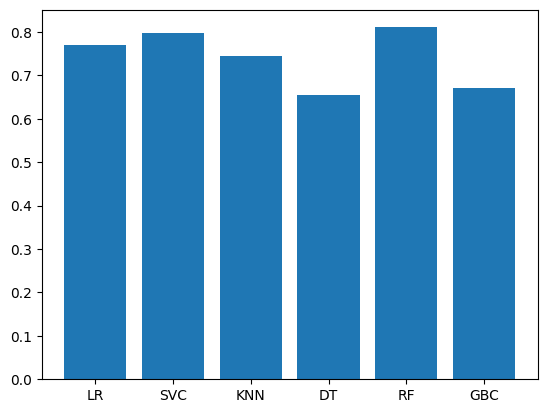

In [70]:

plt.bar(final_data['models'],final_data['ACC'])

In [71]:
final_data2=pd.DataFrame({'models':['LR','SVC','KNN','DT','RF','GBC'],'PRE':[precision_score(Y_test,Y_pred1),precision_score(Y_test,Y_pred2),precision_score(Y_test,Y_pred3),precision_score(Y_test,Y_pred4),precision_score(Y_test,Y_pred5),precision_score(Y_test,Y_pred6)]})

In [72]:
final_data2

,models,PRE
0,LR,0.904272
1,SVC,0.897202
2,KNN,0.789064
3,DT,0.656703
4,RF,0.798053
5,GBC,0.609740


<BarContainer object of 6 artists>

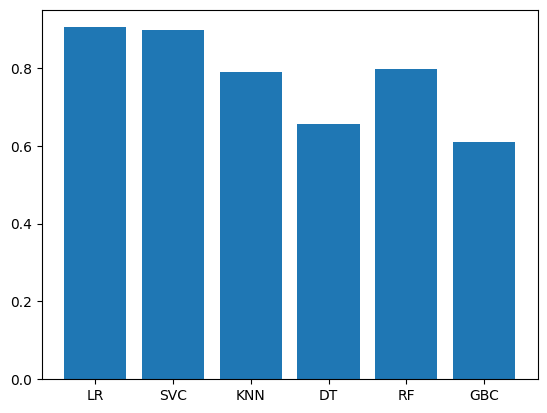

In [73]:
plt.bar(final_data2['models'],final_data2['PRE'])

In [74]:
final_data3=pd.DataFrame({'models':['LR','SVC','KNN','DT','RF','GBC'],'F1':[f1_score(Y_test,Y_pred1),f1_score(Y_test,Y_pred2),f1_score(Y_test,Y_pred3),f1_score(Y_test,Y_pred4),f1_score(Y_test,Y_pred5),f1_score(Y_test,Y_pred6)]})

In [75]:
final_data3

,models,F1
0,LR,0.725457
1,SVC,0.767649
2,KNN,0.723370
3,DT,0.654818
4,RF,0.814855
5,GBC,0.743686


<BarContainer object of 6 artists>

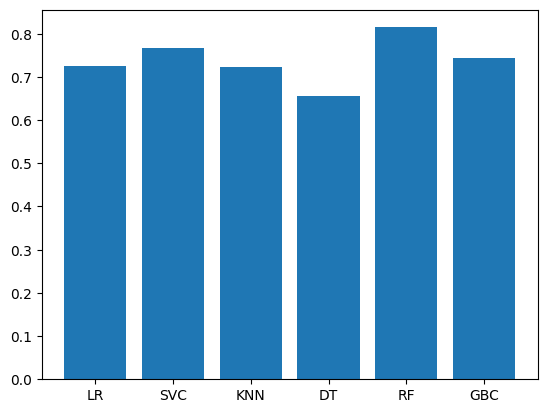

In [76]:
plt.bar(final_data3['models'],final_data3['F1'])

# SAVE THE MODEL

In [77]:
X=scaler.fit_transform(X)

In [78]:
rf.fit(X,Y)

RandomForestClassifier()

In [79]:
import joblib

In [80]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [81]:
model=joblib.load('churn_predict_model')

In [82]:
data.columns

Index(['vintage', 'age', 'dependents', 'city', 'customer_nw_category',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'churn', 'gender_Male', 'occupation_retired',
       'occupation_salaried', 'occupation_self_employed',
       'occupation_student'],
      dtype='object')

In [83]:
data.shape

(24832, 21)

In [84]:
model.predict([[1579,42,2.0,1494.0,3,927.72,1401.72,1643.31,1871.12,0.33,1538.06,1157.15,1677.16,1,1,0,0,1,0,0]])

array([0], dtype=int64)

# GUI

In [85]:
from tkinter import *
import joblib

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=int(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    p8=float(e8.get())
    p9=float(e9.get())
    p10=float(e10.get())
    p11=float(e11.get())
    p12=float(e12.get())
    p13=float(e13.get())
    p14=float(e14.get())
    p15=float(e15.get())
    p16=int(e16.get())
    p17=int(e17.get())
    if(p17==1):
        occupation_retired=1
        occupation_salaried=0
        occupation_self_employed=0
        occupation_student=0
    elif(p17==2):
        occupation_retired=0
        occupation_salaried=1
        occupation_self_employed=0
        occupation_student=0
    elif(p17==3):
        occupation_retired=0
        occupation_salaried=0
        occupation_self_employed=1
        occupation_student=0
    elif(p17==2):
        occupation_retired=0
        occupation_salaried=0
        occupation_self_employed=0
        occupation_student=1
    model=joblib.load('churn_predict_model')
    result=model.predict(scaler.transform([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student]]))
    if result==0:
        Label(master,text= "No, he will not churn.").grid(row=31)
    else:
        Label(master,text=" he will churn.").grid(row=31)
        


In [88]:
master=Tk()
master.title("predicting about a person's churning")
label=Label(master,text="predicting about a person's churning",bg="black",fg="white").grid(row=0,columnspan=2)

Label(master,text="Enter vintage").grid(row=1)
Label(master,text="enter age").grid(row=2)
Label(master,text="enter dependents").grid(row=3)
Label(master,text="Enter city").grid(row=4)
Label(master,text="Enter customer category").grid(row=5)
Label(master,text="Enter current balance").grid(row=6)
Label(master,text="Enter previous month end balance").grid(row=7)
Label(master,text="Enter average monthly balance prevQ").grid(row=8)
Label(master,text="Enter average monthly balance prevQ2").grid(row=9)
Label(master,text="Enter current_month_credit").grid(row=10)
Label(master,text="Enter previous_month_credit").grid(row=11)
Label(master,text="Enter current_month_debit").grid(row=12)
Label(master,text="Enter previous_month_debit").grid(row=13)
Label(master,text="Enter current_month_balance").grid(row=14)
Label(master,text="Enter previous_month_debit").grid(row=15)
Label(master,text="Enter gender").grid(row=16)
Label(master,text="Enter employment type").grid(row=17)



In [ ]:
e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)
e7=Entry(master)
e8=Entry(master)
e9=Entry(master)
e10=Entry(master)
e11=Entry(master)
e12=Entry(master)
e13=Entry(master)
e14=Entry(master)
e15=Entry(master)
e16=Entry(master)
e17=Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)
e12.grid(row=12,column=1)
e13.grid(row=13,column=1)
e14.grid(row=14,column=1)
e15.grid(row=15,column=1)
e16.grid(row=16,column=1)
e17.grid(row=17,column=1)

Button(master,text='predict',command=show_entry_fields).grid()

mainloop()